In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#April Elections in israel 

elec = pd.read_csv('expc.csv',encoding='Windows-1255')

In [3]:
elec.head()

,שם ישוב,סמל ישוב,בזב,מצביעים,פסולים,כשרים,אמת,ג,דעם,ום,...,צק,ץ,ץז,ץי,ק,קי,קן,קף,ר,שס
0,שחר,7,516,371,0,371,17,2,0,0,...,0,0,0,0,0,0,0,0,0,33
1,תירוש,10,333,237,2,235,4,3,0,0,...,0,0,0,0,0,0,0,0,0,73
2,"ניר ח""ן",11,403,289,1,288,21,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,חצבה,13,502,403,0,403,44,2,0,0,...,0,0,0,0,3,0,0,0,0,2
4,נועם,15,302,217,2,215,1,4,0,0,...,0,0,0,0,0,0,0,0,0,25


In [4]:
#calculating voting precentage
overall = sum(elec['בזב'])
voters = sum(elec['כשרים'])

voting_pre = (voters/overall) * 100
print(voting_pre)

67.9724638072069


In [5]:
#sorting only the parties who is been elected

parties = elec[['שם ישוב','בזב','מצביעים','כשרים','פסולים','טב','אמת','מחל','פה','שס','ג','מרצ','כ','דעם','נ']]

In [6]:
parties.head()

,שם ישוב,בזב,מצביעים,כשרים,פסולים,טב,אמת,מחל,פה,שס,ג,מרצ,כ,דעם,נ
0,שחר,516,371,371,0,3,17,141,99,33,2,9,21,0,23
1,תירוש,333,237,235,2,10,4,124,5,73,3,1,9,0,4
2,"ניר ח""ן",403,289,288,1,4,21,84,111,2,0,10,14,0,17
3,חצבה,502,403,403,0,5,44,26,250,2,2,17,7,0,21
4,נועם,302,217,215,2,5,1,165,5,25,4,0,2,0,1


In [7]:
#Data cleaning - Checking for nulls

print(parties['שם ישוב'].isnull().sum())
print(parties['בזב'].isnull().sum())
print(parties['מצביעים'].isnull().sum())

0
0
0


In [8]:
#Data cleaning - Checking for ZEROS
print(parties['בזב'].eq(0).any())
print(parties['מצביעים'].eq(0).any())

parties[parties['בזב'] == 0]

True
False


,שם ישוב,בזב,מצביעים,כשרים,פסולים,טב,אמת,מחל,פה,שס,ג,מרצ,כ,דעם,נ
1213,מעטפות חיצוניות,0,240783,238822,1961,10822,11111,70073,68702,10064,8070,8155,7956,2791,10645


In [9]:
parties = parties[:1213]

In [10]:
print(parties['בזב'].eq(0).any())

False


In [11]:
parties.head()

,שם ישוב,בזב,מצביעים,כשרים,פסולים,טב,אמת,מחל,פה,שס,ג,מרצ,כ,דעם,נ
0,שחר,516,371,371,0,3,17,141,99,33,2,9,21,0,23
1,תירוש,333,237,235,2,10,4,124,5,73,3,1,9,0,4
2,"ניר ח""ן",403,289,288,1,4,21,84,111,2,0,10,14,0,17
3,חצבה,502,403,403,0,5,44,26,250,2,2,17,7,0,21
4,נועם,302,217,215,2,5,1,165,5,25,4,0,2,0,1


In [12]:
new_df = parties.drop(['בזב','פסולים','מצביעים','כשרים'],axis=1)
new_df.head()

,שם ישוב,טב,אמת,מחל,פה,שס,ג,מרצ,כ,דעם,נ
0,שחר,3,17,141,99,33,2,9,21,0,23
1,תירוש,10,4,124,5,73,3,1,9,0,4
2,"ניר ח""ן",4,21,84,111,2,0,10,14,0,17
3,חצבה,5,44,26,250,2,2,17,7,0,21
4,נועם,5,1,165,5,25,4,0,2,0,1


In [13]:
#Voting in the big cites

big_cities = new_df[new_df['שם ישוב'].isin(['תל אביב - יפו','ירושלים','חיפה','אשדוד','אילת'])]
big_cities.reset_index(inplace=True)
big_cities.drop('index',axis=1,inplace=True)
big_cities.set_index(big_cities['שם ישוב'],inplace=True)
big_cities.drop('שם ישוב',axis=1,inplace=True)
big_cities.head()

C:\Users\Amit Aizenkot Moyal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,טב,אמת,מחל,פה,שס,ג,מרצ,כ,דעם,נ
שם ישוב,,,,,,,,,,
אשדוד,1869,1755,39499,19146,13262,13606,610,4259,21,2539
אילת,507,746,9831,5942,930,103,332,692,30,562
ירושלים,17662,7764,64380,30576,35773,60632,8430,5203,407,11599
חיפה,3016,8127,34217,47261,2931,5210,6792,7310,1464,3320
תל אביב - יפו,2899,22794,51596,122271,8560,2397,24027,6482,1823,5251


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B41974D358>,
      dtype=object)

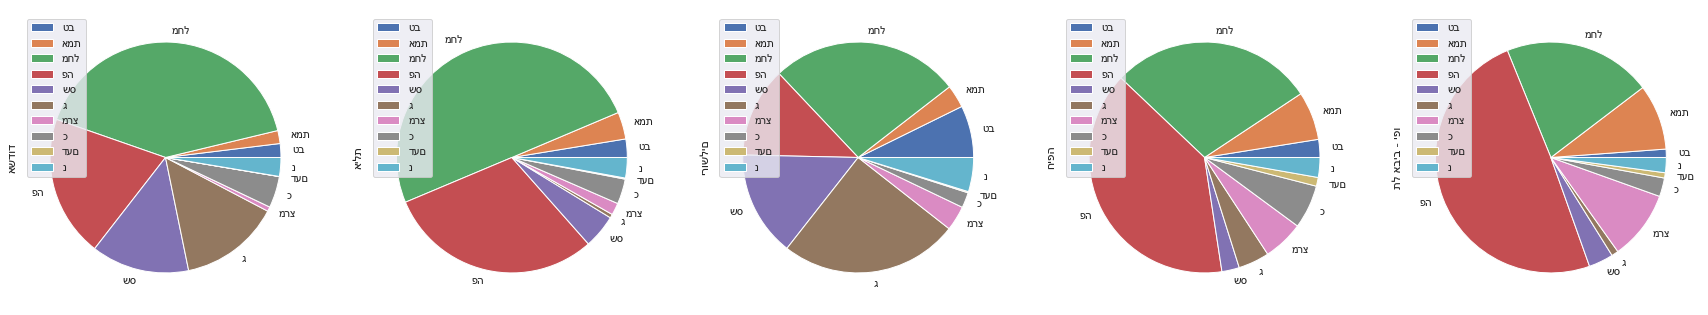

In [14]:
big_cities.T.plot.pie(subplots=True, figsize=(30,30))


In [15]:
#dsq votes

dsq = parties[['שם ישוב','מצביעים','פסולים']]
dsq.head()

,שם ישוב,מצביעים,פסולים
0,שחר,371,0
1,תירוש,237,2
2,"ניר ח""ן",289,1
3,חצבה,403,0
4,נועם,217,2


C:\Users\Amit Aizenkot Moyal\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


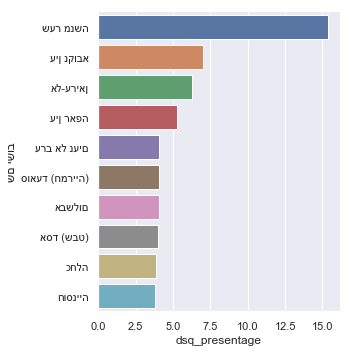

In [16]:
dsq['dsq_presentage'] = (dsq['פסולים']/dsq['מצביעים']) * 100 
ddata = dsq.sort_values(by = 'dsq_presentage',ascending=False).head(10)
sns.catplot(x="dsq_presentage",y="שם ישוב",data=ddata,kind='bar')

Text(0.5, 1.0, '**ARABS UNITED LIST**')

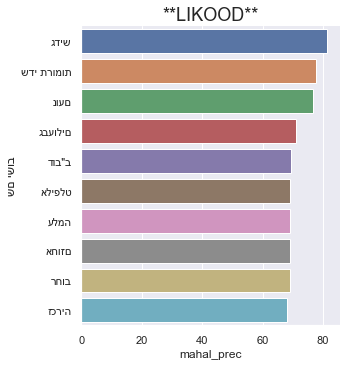

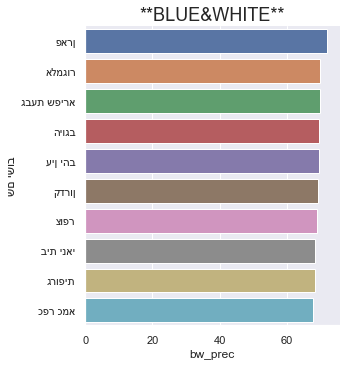

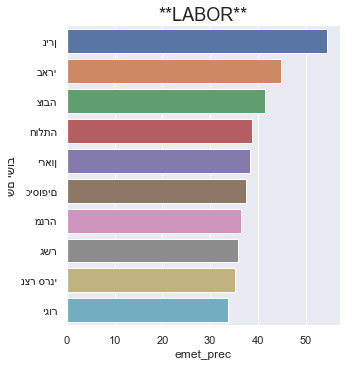

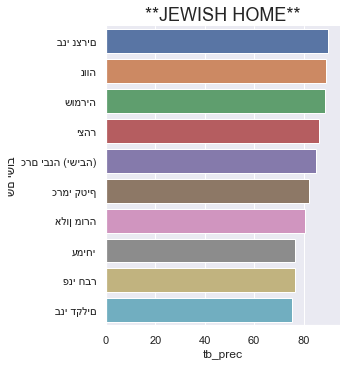

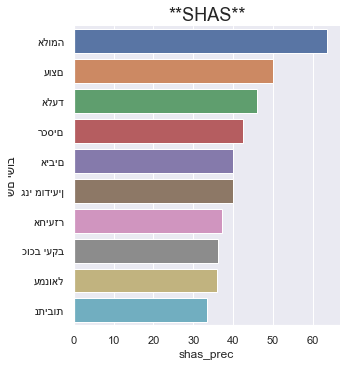

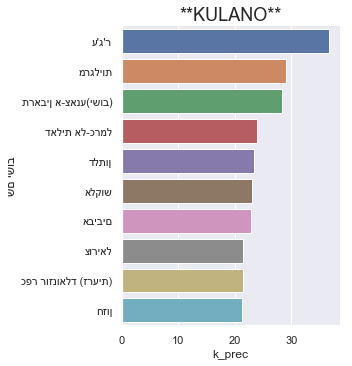

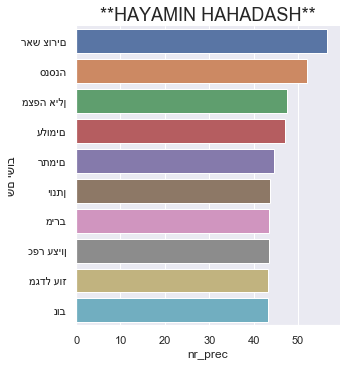

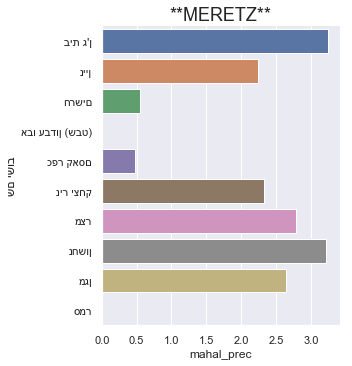

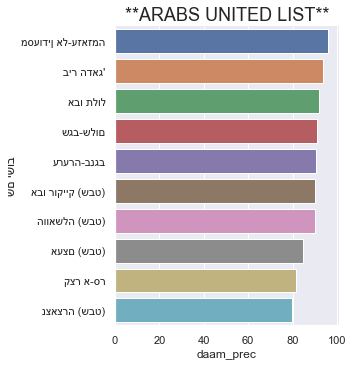

In [17]:
#Voting for each representative 

#likood

parties['mahal_prec'] = (parties['מחל'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'mahal_prec',ascending=False).head(10)
sns.catplot(x="mahal_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**LIKOOD**',size=18)

#Blue&White

parties['bw_prec'] = (parties['פה'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'bw_prec',ascending=False).head(10)
sns.catplot(x="bw_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**BLUE&WHITE**',size=18)

#Labor party

parties['emet_prec'] = (parties['אמת'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'emet_prec',ascending=False).head(10)
sns.catplot(x="emet_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**LABOR**',size=18)

#Juwish home party

parties['tb_prec'] = (parties['טב'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'tb_prec',ascending=False).head(10)
sns.catplot(x="tb_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**JEWISH HOME**',size=18)

#shas 

parties['shas_prec'] = (parties['שס'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'shas_prec',ascending=False).head(10)
sns.catplot(x="shas_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**SHAS**',size=18)

#Kulano

parties['k_prec'] = (parties['כ'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'k_prec',ascending=False).head(10)
sns.catplot(x="k_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**KULANO**',size=18)

#Hayamin Hahadash

parties['nr_prec'] = (parties['נ'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'nr_prec',ascending=False).head(10)
sns.catplot(x="nr_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**HAYAMIN HAHADASH**',size=18)

#Meretz

parties['meretz_prec'] = (parties['מרצ'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'meretz_prec',ascending=False).head(10)
sns.catplot(x="mahal_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**MERETZ**',size=18)

#Arabs united list

parties['daam_prec'] = (parties['דעם'] / parties['כשרים']) * 100
ddata = parties.sort_values(by = 'daam_prec',ascending=False).head(10)
sns.catplot(x="daam_prec",y="שם ישוב",data=ddata,kind='bar')
plt.title('**ARABS UNITED LIST**',size=18)


In [18]:
#clustring to find similar voting places

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [19]:
clustering_data = parties[['שם ישוב','mahal_prec','tb_prec','k_prec','bw_prec','nr_prec','meretz_prec','emet_prec','shas_prec','daam_prec']]

In [20]:
clustering_data.head()

,שם ישוב,mahal_prec,tb_prec,k_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,daam_prec
0,שחר,38.005391,0.808625,5.660377,26.684636,6.199461,2.425876,4.582210,8.894879,0.0
1,תירוש,52.765957,4.255319,3.829787,2.127660,1.702128,0.425532,1.702128,31.063830,0.0
2,"ניר ח""ן",29.166667,1.388889,4.861111,38.541667,5.902778,3.472222,7.291667,0.694444,0.0
3,חצבה,6.451613,1.240695,1.736973,62.034739,5.210918,4.218362,10.918114,0.496278,0.0
4,נועם,76.744186,2.325581,0.930233,2.325581,0.465116,0.000000,0.465116,11.627907,0.0


In [21]:
clustering_data.describe()

,mahal_prec,tb_prec,k_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,daam_prec
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,20.052174,6.461258,2.943455,31.924881,5.059513,5.879478,8.400831,2.941091,4.132583
std,17.954123,14.749982,3.226260,22.129198,8.141908,7.345122,8.334917,5.851180,13.909973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.405405,0.188679,0.987654,9.019608,1.004016,0.781250,1.486989,0.000000,0.000000
50%,14.565826,0.931677,2.222222,35.277778,2.317881,3.645833,5.988024,0.666310,0.000000
75%,31.219512,3.333333,3.939379,51.916376,4.458599,7.846411,12.925170,3.149606,0.020483
max,81.443299,90.039841,36.727880,72.000000,56.572770,64.835614,54.385965,63.508772,95.912807


Text(0, 0.5, 'WCSS')

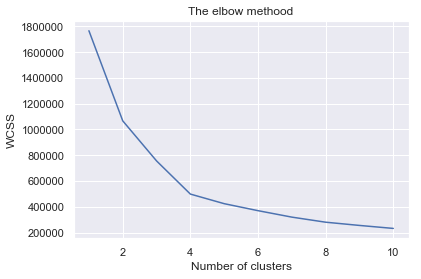

In [22]:
X = clustering_data.drop('שם ישוב',axis=1)

#The elbow methood

wcss=[]

for i in range(1,11):
    kmens = KMeans(n_clusters=i,init = 'k-means++',max_iter= 300,n_init=10,random_state=0)
    kmens.fit(X)
    wcss.append(kmens.inertia_)

    
plt.plot(range(1,11),wcss)
plt.title("The elbow methood")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
    

In [23]:
kmens = KMeans(n_clusters=4,init = 'k-means++',max_iter= 300,n_init=10,random_state=0)

y_kmeans = kmens.fit_predict(X)

In [24]:
clusterd_data = clustering_data.copy()
clusterd_data['cluster'] = y_kmeans

In [25]:
clusterd_data[clusterd_data['cluster'] == 0][:10]

,שם ישוב,mahal_prec,tb_prec,k_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,daam_prec,cluster
2,"ניר ח""ן",29.166667,1.388889,4.861111,38.541667,5.902778,3.472222,7.291667,0.694444,0.000000,0
3,חצבה,6.451613,1.240695,1.736973,62.034739,5.210918,4.218362,10.918114,0.496278,0.000000,0
5,בית ניר,2.416918,0.000000,0.906344,44.712991,1.510574,26.888218,21.752266,0.000000,0.000000,0
6,שדה משה,23.841060,0.662252,3.642384,54.635762,2.317881,0.993377,6.291391,0.662252,0.000000,0
7,באר אורה,26.570048,0.483092,2.173913,40.096618,3.623188,5.072464,8.937198,1.449275,0.000000,0
8,מקווה ישראל,22.549020,4.901961,2.941176,41.176471,6.862745,4.901961,12.745098,0.980392,0.000000,0
10,לכיש,4.565217,0.000000,1.086957,55.652174,3.043478,13.043478,17.608696,0.217391,0.217391,0
11,ראש פינה,22.165533,4.421769,3.174603,39.965986,1.757370,7.482993,10.657596,0.963719,0.056689,0
13,מזכרת בתיה,25.964042,2.070676,4.823311,42.318661,5.517669,3.285803,5.902046,1.450713,0.024799,0
14,יסוד המעלה,18.141097,3.471445,2.351624,50.391937,4.031355,3.247480,10.526316,0.559910,0.000000,0


In [26]:
clusterd_data[clusterd_data['cluster'] == 1][:10]

,שם ישוב,mahal_prec,tb_prec,k_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,daam_prec,cluster
9,אמציה,22.360248,37.267081,4.347826,13.043478,13.043478,0.000000,0.621118,0.000000,0.0,1
34,נחושה,21.926910,13.787375,3.654485,5.149502,39.700997,0.664452,1.993355,2.491694,0.0,1
84,שדה יעקב,21.825397,19.246032,8.134921,13.293651,24.206349,1.388889,3.571429,0.793651,0.0,1
118,כפר פינס,15.286624,43.949045,3.503185,4.458599,23.248408,0.636943,0.955414,0.318471,0.0,1
136,בית צבי,15.384615,66.666667,2.564103,0.000000,0.000000,0.000000,0.000000,7.692308,0.0,1
138,"כפר הרא""ה",20.068027,36.224490,1.700680,9.863946,19.047619,0.680272,1.530612,1.530612,0.0,1
173,טירת צבי,11.694511,17.183771,0.238663,15.274463,33.890215,1.193317,5.489260,0.000000,0.0,1
202,שדה אליהו,16.666667,22.636816,1.741294,14.179104,28.855721,0.995025,2.736318,0.248756,0.0,1
205,הזורעים,27.251185,35.308057,1.658768,4.265403,20.853081,0.473934,0.710900,1.658768,0.0,1
239,ניצן,32.000000,34.232558,2.139535,2.046512,18.418605,0.186047,0.465116,2.511628,0.0,1


In [27]:
clusterd_data[clusterd_data['cluster'] == 2][:10]

,שם ישוב,mahal_prec,tb_prec,k_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,daam_prec,cluster
0,שחר,38.005391,0.808625,5.660377,26.684636,6.199461,2.425876,4.582210,8.894879,0.000000,2
1,תירוש,52.765957,4.255319,3.829787,2.127660,1.702128,0.425532,1.702128,31.063830,0.000000,2
4,נועם,76.744186,2.325581,0.930233,2.325581,0.465116,0.000000,0.465116,11.627907,0.000000,2
12,שדות מיכה,51.794872,3.076923,5.641026,6.666667,3.076923,0.000000,2.564103,16.923077,0.000000,2
15,אופקים,36.276462,3.452091,2.921000,6.675518,2.426791,0.420447,1.165450,19.318433,0.007376,2
16,עוצם,35.493827,0.925926,1.543210,4.629630,1.851852,0.000000,0.308642,50.000000,0.000000,2
19,שדה דוד,56.856187,0.334448,2.341137,19.397993,3.678930,0.000000,3.344482,11.705686,0.000000,2
20,איתן,53.183521,8.988764,2.996255,0.374532,4.119850,0.000000,0.749064,6.367041,0.000000,2
21,גפן,64.864865,2.162162,1.081081,6.486486,3.243243,0.540541,1.621622,11.351351,0.000000,2
22,אליכין,48.076923,3.997976,6.528340,16.902834,2.631579,0.657895,2.935223,10.070850,0.000000,2


In [28]:
clusterd_data[clusterd_data['cluster'] == 3][:10]

,שם ישוב,mahal_prec,tb_prec,k_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,daam_prec,cluster
315,יסודות,0.660066,1.980198,0.000000,0.330033,0.660066,0.000000,0.000000,2.640264,0.000000,3
337,אבו גוש,10.906131,0.596853,0.759631,18.122626,0.054259,16.983180,1.899078,1.627781,19.967444,3
338,אבו סנאן,2.981314,0.083981,10.812513,14.717615,0.146966,3.926097,1.259710,1.301701,12.429141,3
339,דחי,4.411765,0.000000,2.205882,8.088235,0.000000,8.823529,3.676471,5.882353,26.470588,3
340,אכסאל,0.915332,0.020803,0.790514,1.289786,0.000000,5.700021,0.312045,0.020803,21.052632,3
342,מגאר,2.929155,0.068120,1.389646,31.280654,0.449591,6.485014,1.743869,7.275204,20.204360,3
343,בועיינה-נוג'ידאת,1.127361,0.060938,1.035954,6.581353,0.030469,3.351615,4.204753,2.864107,39.853748,3
344,בענה,0.152130,0.050710,3.625761,0.912779,0.050710,0.836714,1.774848,4.056795,46.577079,3
346,ג'ש (גוש חלב),0.440529,0.000000,0.352423,15.770925,0.088106,8.017621,2.114537,3.436123,9.955947,3
347,דבוריה,0.266667,0.133333,2.053333,0.960000,0.000000,3.493333,0.373333,0.026667,44.746667,3


In [29]:
#And the big cities

clusterd_data[clusterd_data['שם ישוב'].isin(['תל אביב - יפו','ירושלים','חיפה','אשדוד','אילת'])]

,שם ישוב,mahal_prec,tb_prec,k_prec,bw_prec,nr_prec,meretz_prec,emet_prec,shas_prec,daam_prec,cluster
42,אשדוד,33.939389,1.605932,3.659532,16.451139,2.181628,0.524141,1.507978,11.395331,0.018044,2
999,אילת,43.340828,2.235154,3.050743,26.195829,2.477626,1.463651,3.288807,4.099987,0.132258,2
1010,ירושלים,24.756873,6.791797,2.000777,11.757784,4.460313,3.241697,2.985591,13.756254,0.156509,2
1136,חיפה,23.666810,2.086071,5.056094,32.688929,2.296338,4.697810,5.621187,2.027279,1.012602,0
1174,תל אביב - יפו,19.280944,1.083329,2.422263,45.691533,1.962250,8.978666,8.517905,3.198792,0.681238,0


In [30]:
#Profiling the clusters

c1 = clusterd_data[clusterd_data['cluster'] == 0]
c2 = clusterd_data[clusterd_data['cluster'] == 1]
c3 = clusterd_data[clusterd_data['cluster'] == 2]
c4 = clusterd_data[clusterd_data['cluster'] == 3]

m1 = {'m_mahal':np.mean(c1.mahal_prec),
     'm_tb':np.mean(c1.tb_prec),
     'm_k':np.mean(c1.k_prec),
     'm_bw':np.mean(c1.bw_prec),
     'm_nr':np.mean(c1.nr_prec),
     'm_meretz':np.mean(c1.meretz_prec),
     'm_emet':np.mean(c1.emet_prec),
     'm_daam':np.mean(c1.daam_prec),
     'm_shas':np.mean(c1.shas_prec) 
      }

mean1 = pd.DataFrame([m1],index=['AVG_Votes']).transpose().reset_index()
mean1.rename({'index':'Party'}, axis=1, inplace=True)



m2 = {'m_mahal':np.mean(c2.mahal_prec),
     'm_tb':np.mean(c2.tb_prec),
     'm_k':np.mean(c2.k_prec),
     'm_bw':np.mean(c2.bw_prec),
     'm_nr':np.mean(c2.nr_prec),
     'm_meretz':np.mean(c2.meretz_prec),
     'm_emet':np.mean(c2.emet_prec),
     'm_daam':np.mean(c2.daam_prec),
     'm_shas':np.mean(c2.shas_prec)  
      }

mean2 = pd.DataFrame([m2],index=['AVG_Votes']).transpose().reset_index()
mean2.rename({'index':'Party'}, axis=1, inplace=True)



m3 = {'m_mahal':np.mean(c3.mahal_prec),
     'm_tb':np.mean(c3.tb_prec),
     'm_k':np.mean(c3.k_prec),
     'm_bw':np.mean(c3.bw_prec),
     'm_nr':np.mean(c3.nr_prec),
     'm_meretz':np.mean(c3.meretz_prec),
     'm_emet':np.mean(c3.emet_prec),
     'm_daam':np.mean(c3.daam_prec),
     'm_shas':np.mean(c3.shas_prec) 
      }

mean3 = pd.DataFrame([m3],index=['AVG_Votes']).transpose().reset_index()
mean3.rename({'index':'Party'}, axis=1, inplace=True)



m4 = {'m_mahal':np.mean(c4.mahal_prec),
     'm_tb':np.mean(c4.tb_prec),
     'm_k':np.mean(c4.k_prec),
     'm_bw':np.mean(c4.bw_prec),
     'm_nr':np.mean(c4.nr_prec),
     'm_meretz':np.mean(c4.meretz_prec),
     'm_emet':np.mean(c4.emet_prec),
     'm_daam':np.mean(c4.daam_prec),
     'm_shas':np.mean(c4.shas_prec)
     }

mean4 = pd.DataFrame([m4],index=['AVG_Votes']).transpose().reset_index()
mean4.rename({'index':'Party'}, axis=1, inplace=True)


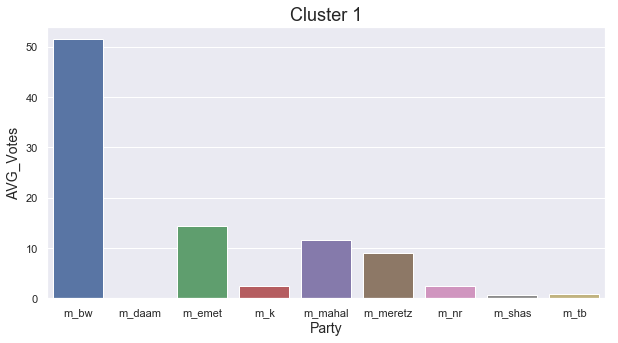

In [31]:
plt.figure(figsize=(10,5))
plt.title('Cluster 1',size=18)
plt.xlabel('Party',size=14)
plt.ylabel('AVG_Votes',size=14)
sns.barplot(x='Party',y='AVG_Votes',data=mean1)

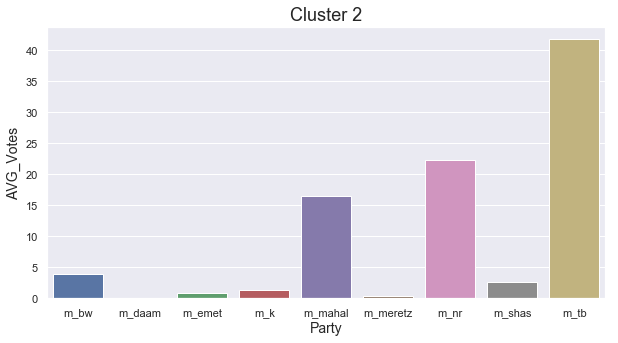

In [32]:
plt.figure(figsize=(10,5))
plt.title('Cluster 2',size=18)
plt.xlabel('Party',size=14)
plt.ylabel('AVG_Votes',size=14)
sns.barplot(x='Party',y='AVG_Votes',data=mean2)

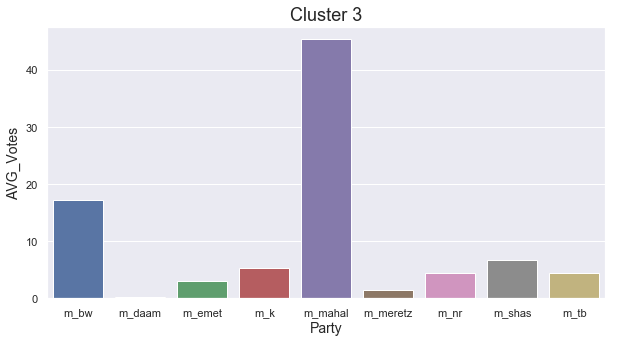

In [33]:
plt.figure(figsize=(10,5))
plt.title('Cluster 3',size=18)
plt.xlabel('Party',size=14)
plt.ylabel('AVG_Votes',size=14)
sns.barplot(x='Party',y='AVG_Votes',data=mean3)


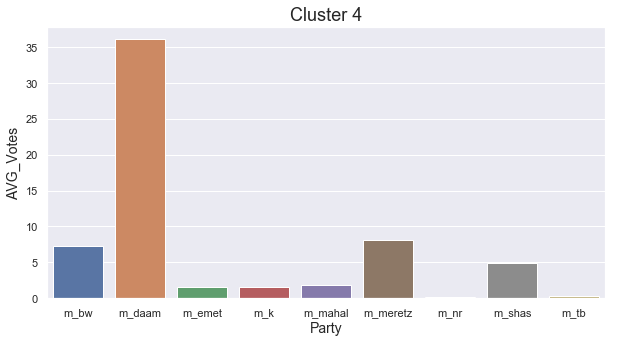

In [34]:
plt.figure(figsize=(10,5))
plt.title('Cluster 4',size=18)
plt.xlabel('Party',size=14)
plt.ylabel('AVG_Votes',size=14)
sns.barplot(x='Party',y='AVG_Votes',data=mean4)